In [1]:
#!pip install shap
import pandas as pd
import numpy as np

# Data preparation

### Data loading
* Pre-processed mushroom csv

In [ ]:
data = pd.read_csv('newMushroom.csv')

In [2]:
data.head(3)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data.columns
#list(data)

Index(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=108)

Attribute Information:

**classes**: edible=e, poisonous=p

**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises**: bruises=t,no=f

**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment**: attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? (2480 of 8125 are "missing", otherwise, one hot encode to 7 fields?)

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Wrt to "ring number" this could be potentially be excluded from one hot encoding and reduce dimensions from 119 to 117, however, for initial observations, we elected to keep all one hot encoded for now.

### Missing Data

In [4]:
data.isnull().sum()

class          0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 108, dtype: int64

No null values are present in the original mushrooms dataset and so no further work is needed.

### Data visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

0    4208
1    3916
Name: class, dtype: int64

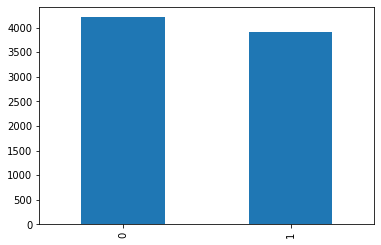

In [6]:
data['class'].value_counts().plot(kind='bar')
data['class'].value_counts()

Our data contains two classes, so our forecast model would be binary. Moreover, we have some kind of balance that will help the model to accurately predict the two categories accurately.

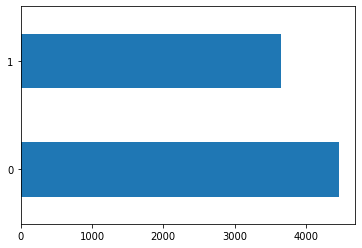

In [7]:
data['cap-shape_x'].value_counts().plot(kind='barh')

x class is the most frequent category in cap-shape feature

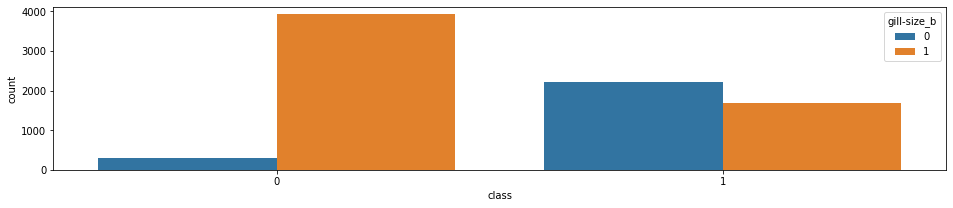

In [8]:
#plot target class distribution 
plt.figure(figsize=(16,3))
sns.countplot(data=data, x='class',hue='gill-size_b')

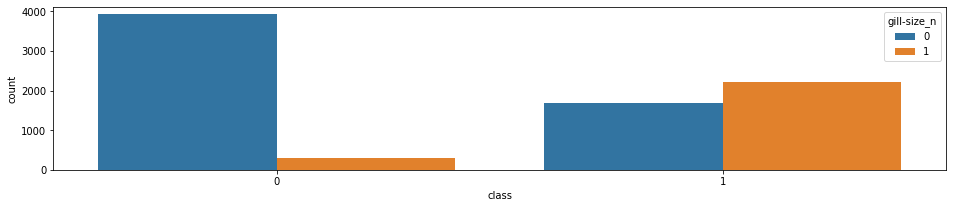

In [9]:
#plot target class distribution 
plt.figure(figsize=(16,3))
sns.countplot(data=data, x='class',hue='gill-size_n')

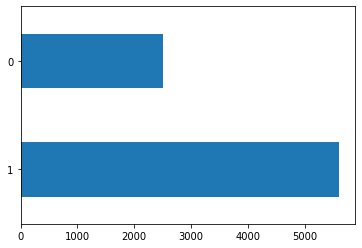

In [10]:
data['gill-size_b'].value_counts().plot(kind='barh')

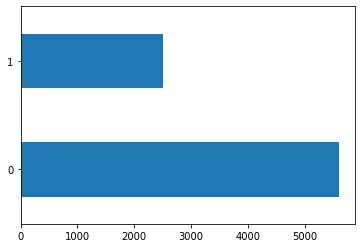

In [11]:
data['gill-size_n'].value_counts().plot(kind='barh')

*  The above plots give the frequency of each class in each categorical feature. For example 'd' is the most frequent class in 'habitat'


### Correlation matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. After one-hot encoding the correlation matrix is fairly large, so it might not be a good idea to run the correlation matrix.

In [12]:
import seaborn as sb
#plt.figure(figsize=(60,40))
#corr = data.corr()
#sb.heatmap(corr, cmap="Blues", annot=True)

In [13]:
data.describe()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Machine learning Model


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

### Data Split


In [15]:
X = data.drop('class',axis=1)
y = data['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

### Train Set

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train, y_pred=dt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      1.00      1.00      1939

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



### Test Set

In [20]:
from sklearn.metrics import confusion_matrix
print('\n')
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n')
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n')
print('Classification report on test data:\n')
print(classification_report(y_true=y_test, y_pred=y_pred))



Accuracy Score on test data:  1.0


Confusion Matrix of test data:
 [[2085    0]
 [   0 1977]]


Classification report on test data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



### DT with criterion = entropy & min_samples_split = 50

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_train, y_pred=clf.predict(X_train)))



Accuracy Score on train data:  1.0


Accuracy Score on the test data:  1.0


Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      1.00      1.00      1939

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



In [22]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 25 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 48] <= 0.5 else to node 22.
	node=1 is a split node: go to node 2 if X[:, 27] <= 0.5 else to node 7.
		node=2 is a split node: go to node 3 if X[:, 86] <= 0.5 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 90] <= 0.5 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a leaf node.
		node=7 is a split node: go to node 8 if X[:, 28] <= 0.5 else to node 21.
			node=8 is a split node: go to node 9 if X[:, 97] <= 0.5 else to node 20.
				node=9 is a split node: go to node 10 if X[:, 40] <= 0.5 else to node 11.
					node=10 is a leaf node.
					node=11 is a split node: go to node 12 if X[:, 20] <= 0.5 else to node 13.
						node=12 is a leaf node.
						node=13 is a split node: go to node 14 if X[:, 100] <= 0.5 else to node 17.
							node=14 is a split node: go to node 15 if X[:, 63] <= 0.5 else to node 16.
								node=15

### Checking for overfitting

In [23]:
clf5 = DecisionTreeClassifier(random_state=40)
clf5.fit(X_train, y_train)
y_train_pred=clf5.predict(X_train)
y_test_pred=clf5.predict(X_test)
print(accuracy_score(y_train,y_train_pred), round(accuracy_score(y_test,y_test_pred),2))

1.0 1.0


In [24]:
path=clf5.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.00073492, 0.00144868, 0.00424262, 0.00636429,
       0.00704946, 0.01234211, 0.01640798, 0.01787143, 0.03240373,
       0.06394361, 0.153615  , 0.17331717])

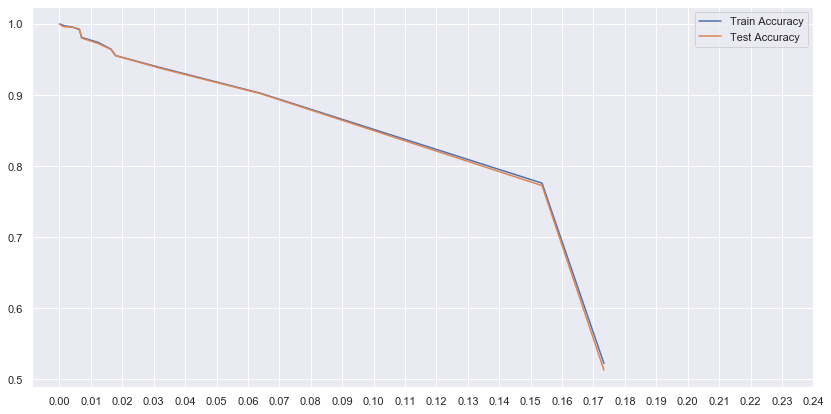

In [25]:
# Checking best pruning value to prevent overfitting
import matplotlib.pyplot as plt


accuracy_train,accuracy_test=[],[]

for i in alphas:
    clf5=DecisionTreeClassifier(ccp_alpha=i)
    
    clf5.fit(X_train, y_train)
    y_train_pred=clf5.predict(X_train)
    y_test_pred=clf5.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))


sns.set()
plt.rcParams["figure.figsize"] = (14, 7)
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()
    

### DT with criterion='gini', Random State = 42

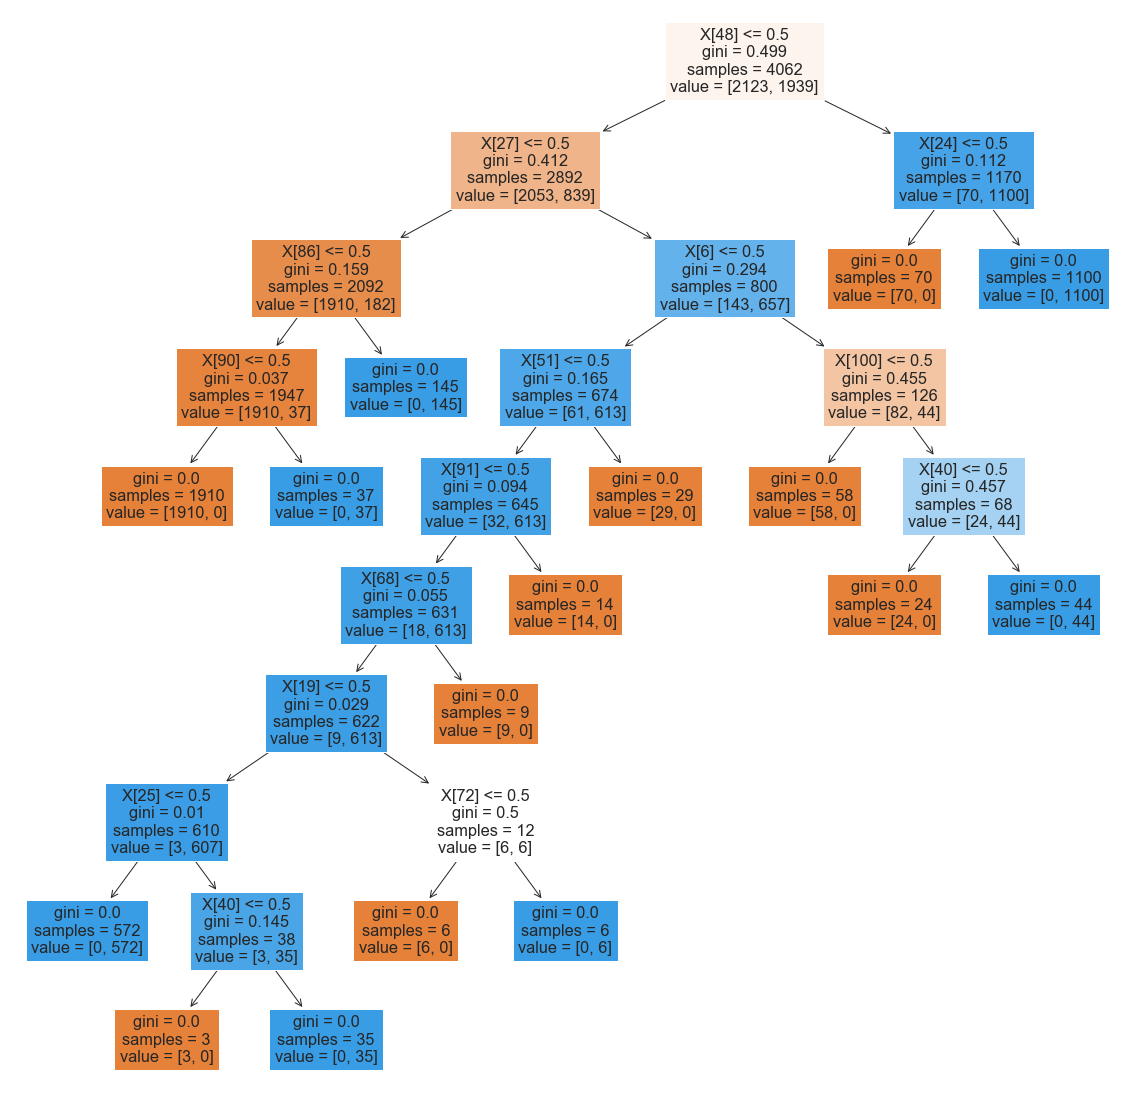



Accuracy Score on train data:  1.0


Accuracy Score on the test data:  1.0


Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



In [26]:
clf1 = DecisionTreeClassifier(criterion='gini',random_state=42).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf1, filled=True)
plt.show()
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf1.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=clf1.predict(X_test)))

### DT with random_state = 0, ccp_alpha = 0.005

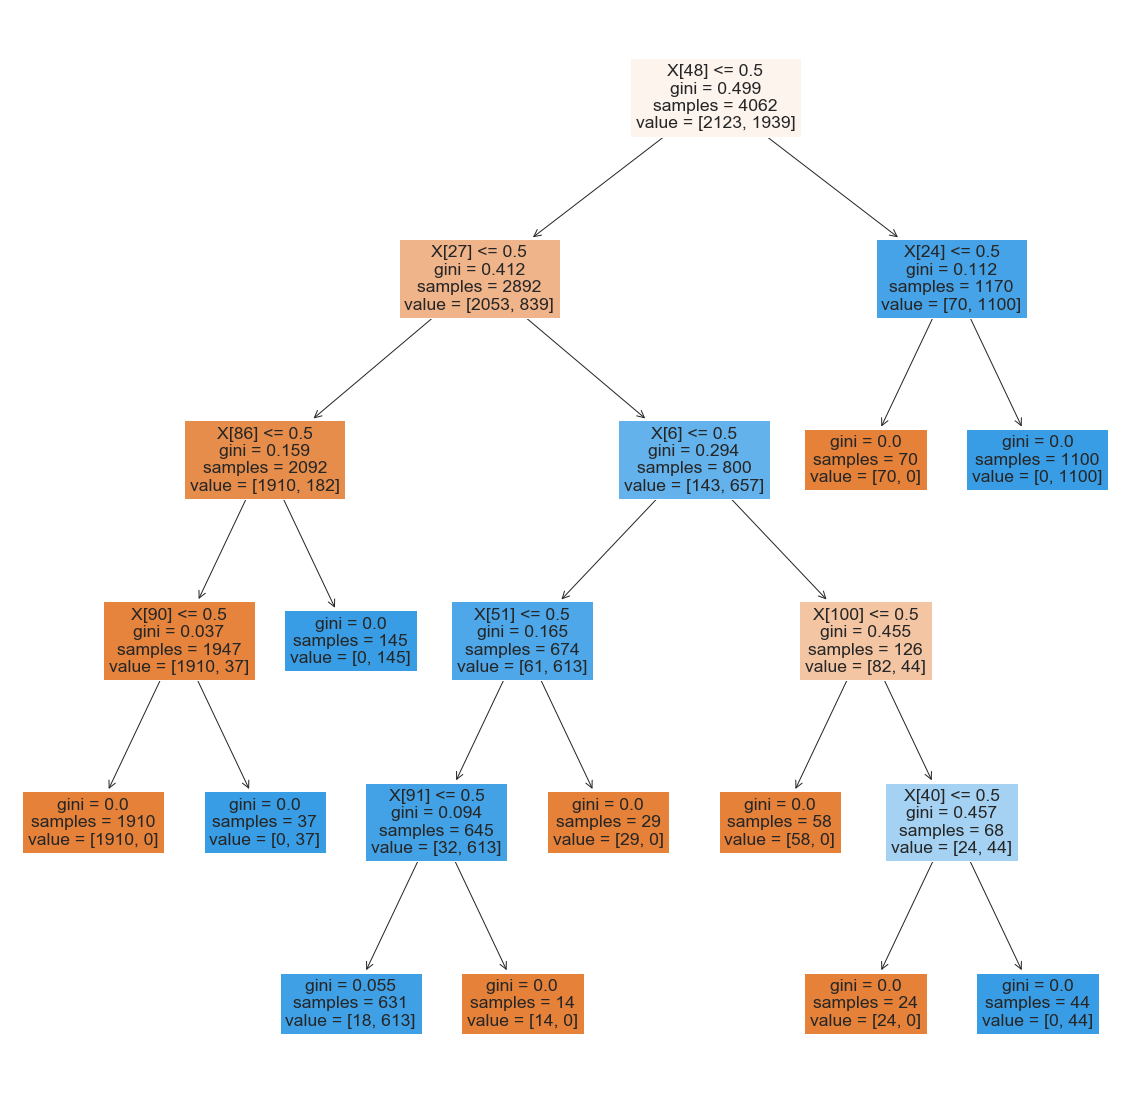



Accuracy Score on train data:  0.9955686853766618


Accuracy Score on the test data:  0.9955686853766618


Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2085
           1       0.99      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



In [27]:
clf2 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf2, filled=True)
plt.show()
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=clf2.predict(X_test)))

In [28]:
n_nodes = clf2.tree_.node_count
children_left = clf2.tree_.children_left
children_right = clf2.tree_.children_right
feature = clf2.tree_.feature
threshold = clf2.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 21 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 48] <= 0.5 else to node 18.
	node=1 is a split node: go to node 2 if X[:, 27] <= 0.5 else to node 7.
		node=2 is a split node: go to node 3 if X[:, 86] <= 0.5 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 90] <= 0.5 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a leaf node.
		node=7 is a split node: go to node 8 if X[:, 6] <= 0.5 else to node 13.
			node=8 is a split node: go to node 9 if X[:, 51] <= 0.5 else to node 12.
				node=9 is a split node: go to node 10 if X[:, 91] <= 0.5 else to node 11.
					node=10 is a leaf node.
					node=11 is a leaf node.
				node=12 is a leaf node.
			node=13 is a split node: go to node 14 if X[:, 100] <= 0.5 else to node 15.
				node=14 is a leaf node.
				node=15 is a split node: go to node 16 if X[:, 40] <= 0.5 else to node 17.
					node=16 is a leaf node.
					node=17 is a 

### DT with random_state = 42, ccp_alpha = 0.01

In [29]:
clf3 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01).fit(X_train, y_train)
#plt.figure(figsize=(20,20))
#plot_tree(clf3, filled=True)
#plt.show()
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf3.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=clf3.predict(X_test)))



Accuracy Score on train data:  0.9812900049236829


Accuracy Score on the test data:  0.9803052683407188


Classification report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2085
           1       0.99      0.97      0.98      1977

    accuracy                           0.98      4062
   macro avg       0.98      0.98      0.98      4062
weighted avg       0.98      0.98      0.98      4062



In [30]:
n_nodes = clf3.tree_.node_count
children_left = clf3.tree_.children_left
children_right = clf3.tree_.children_right
feature = clf3.tree_.feature
threshold = clf3.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 48] <= 0.5 else to node 12.
	node=1 is a split node: go to node 2 if X[:, 27] <= 0.5 else to node 7.
		node=2 is a split node: go to node 3 if X[:, 86] <= 0.5 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 90] <= 0.5 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a leaf node.
		node=7 is a split node: go to node 8 if X[:, 6] <= 0.5 else to node 11.
			node=8 is a split node: go to node 9 if X[:, 51] <= 0.5 else to node 10.
				node=9 is a leaf node.
				node=10 is a leaf node.
			node=11 is a leaf node.
	node=12 is a split node: go to node 13 if X[:, 24] <= 0.5 else to node 14.
		node=13 is a leaf node.
		node=14 is a leaf node.


### ROC Curve

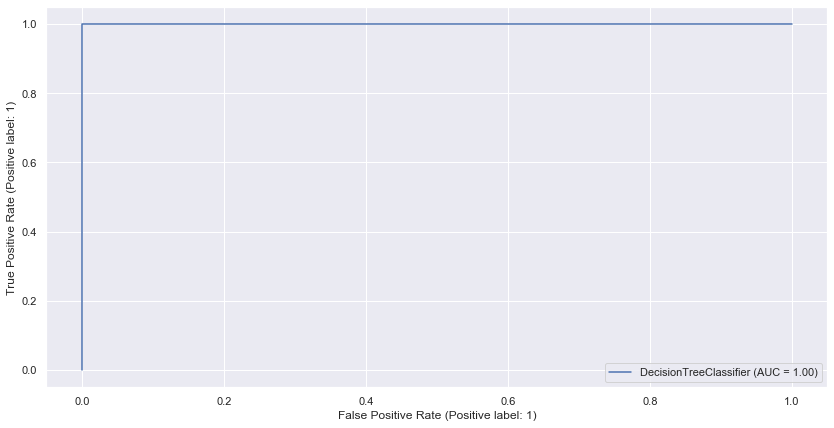

In [31]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

clf4 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
metrics.plot_roc_curve(clf4, X_test, y_test)  
plt.show()    

### k-fold with DT

In [32]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
kfold = StratifiedKFold(n_splits=10)
acc = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'macro'),
       'recall' : make_scorer(recall_score, average = 'macro'), 
       'f1_score' : make_scorer(f1_score, average = 'macro')})
print(acc)

{'fit_time': array([0.01097035, 0.00897527, 0.00997281, 0.00997329, 0.00897646,
       0.00897622, 0.00897598, 0.009974  , 0.00997353, 0.00897622]), 'score_time': array([0.00299239, 0.0039897 , 0.00299215, 0.00299191, 0.00398898,
       0.00299215, 0.00398922, 0.0029912 , 0.00299191, 0.00398922]), 'test_accuracy': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99753695]), 'test_precision': array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 0.9974359]), 'test_recall': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99764151]), 'test_f1_score': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99753262])}


In [34]:
print('Test Accuracy Mean:', acc['test_accuracy'].mean())
print('Test Precision Mean:', acc['test_precision'].mean())
print('Test Recall Mean:', acc['test_recall'].mean())
print('Test F1-score Mean:', acc['test_f1_score'].mean())

Test Accuracy Mean: 0.9997536945812808
Test Precision Mean: 0.9997435897435898
Test Recall Mean: 0.9997641509433961
Test F1-score Mean: 0.9997532619859371


In [35]:
print('Test Accuracy Std:', acc['test_accuracy'].std())
print('Test Precision Std:', acc['test_precision'].std())
print('Test Recall Std:', acc['test_recall'].std())
print('Test F1-score Std:', acc['test_f1_score'].std())

Test Accuracy Std: 0.0007389162561576512
Test Precision Std: 0.0007692307692307665
Test Recall Std: 0.000707547169811329
Test F1-score Std: 0.0007402140421885584


### Feature importance

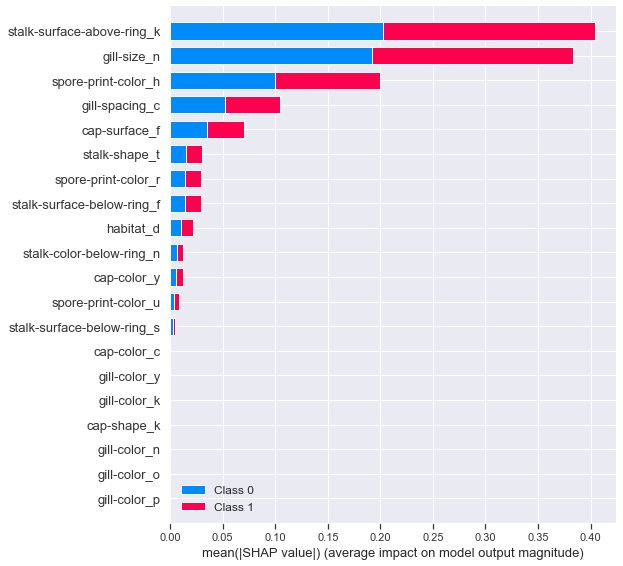

In [36]:
#!pip install shap
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

* Decision Tree classifier give us the access to plot the features importance using the shap library.
* Like we observe before training the model, gill-color is the one of most contributing features.
* The colors give the importance of the feature on predicting the specific class. gill-size and spore-print-color are strong features on predicting both classes almost equally.

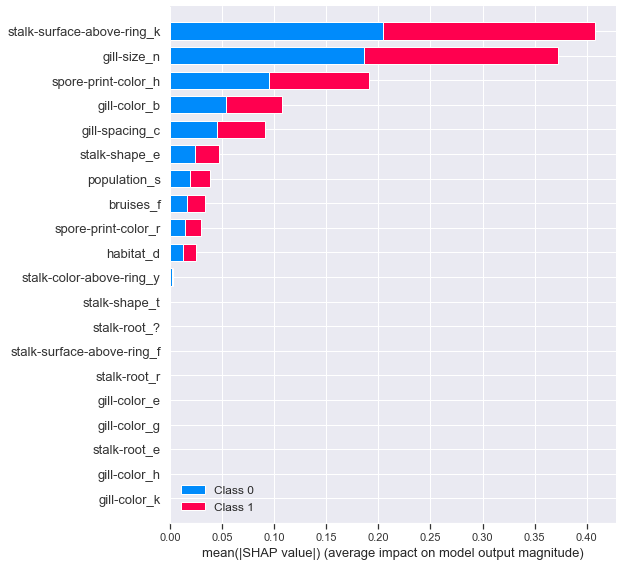

In [37]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

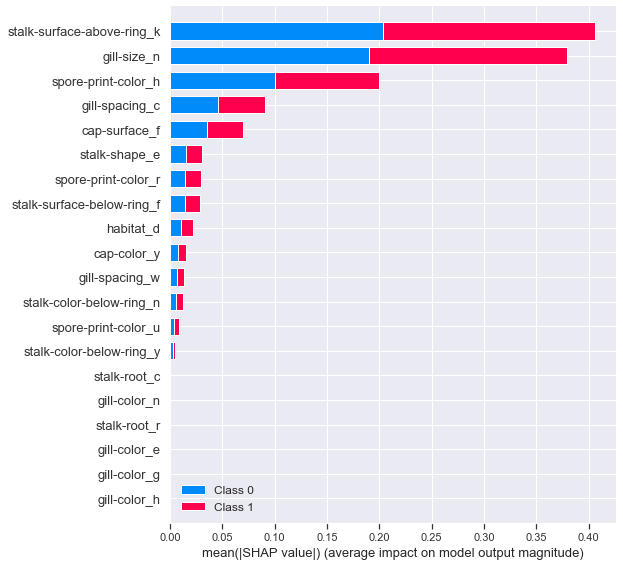

In [38]:
import shap
explainer = shap.TreeExplainer(clf1)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

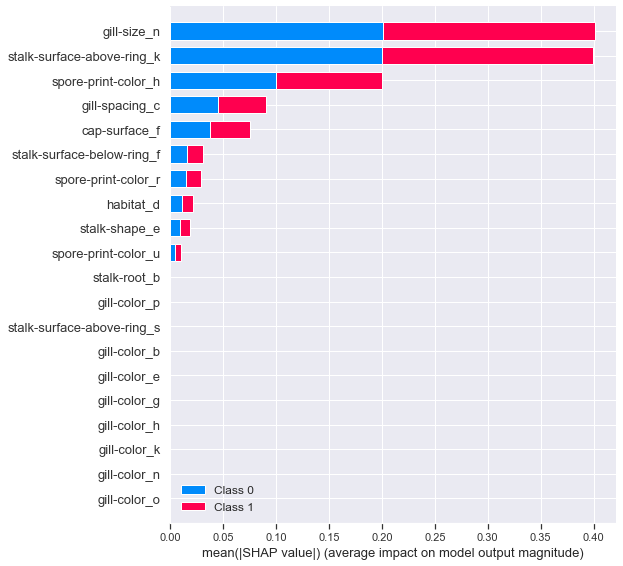

In [39]:
import shap
explainer = shap.TreeExplainer(clf2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

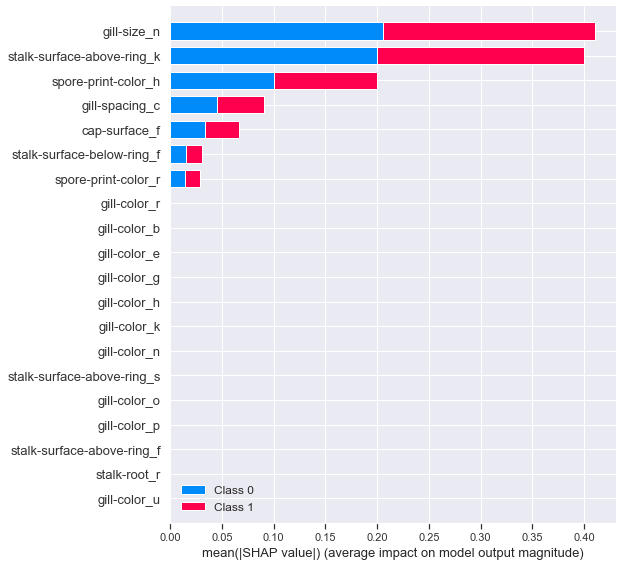

In [40]:
import shap
explainer = shap.TreeExplainer(clf3)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Label encoding for xgboost 

In [41]:
from sklearn.preprocessing import LabelEncoder
Y = data['class']
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

### DT using xgboost

In [42]:
!pip install xgboost

In [43]:
from sklearn import datasets
from sklearn import metrics
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('ggplot')

model_XGB = XGBClassifier().fit(X_train,y_train)
print(model_XGB)

expected_y  = y_test
predicted_y = model_XGB.predict(X_test)

print('\n')
print('Classification report: \n')
print(metrics.classification_report(expected_y, predicted_y))
print('\n')
print('Confusion matrix: \n')
print(metrics.confusion_matrix(expected_y, predicted_y))

[16:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



Confusion matrix: 

[[2085    0]
 [   0 1977]]


In [44]:
!pip install graphviz
from matplotlib.pyplot import figure

In [45]:
# Windows Graphviz Path
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz\bin'

plt.rcParams["figure.figsize"] = (200, 400)
plot_tree(model_XGB); plt.show()

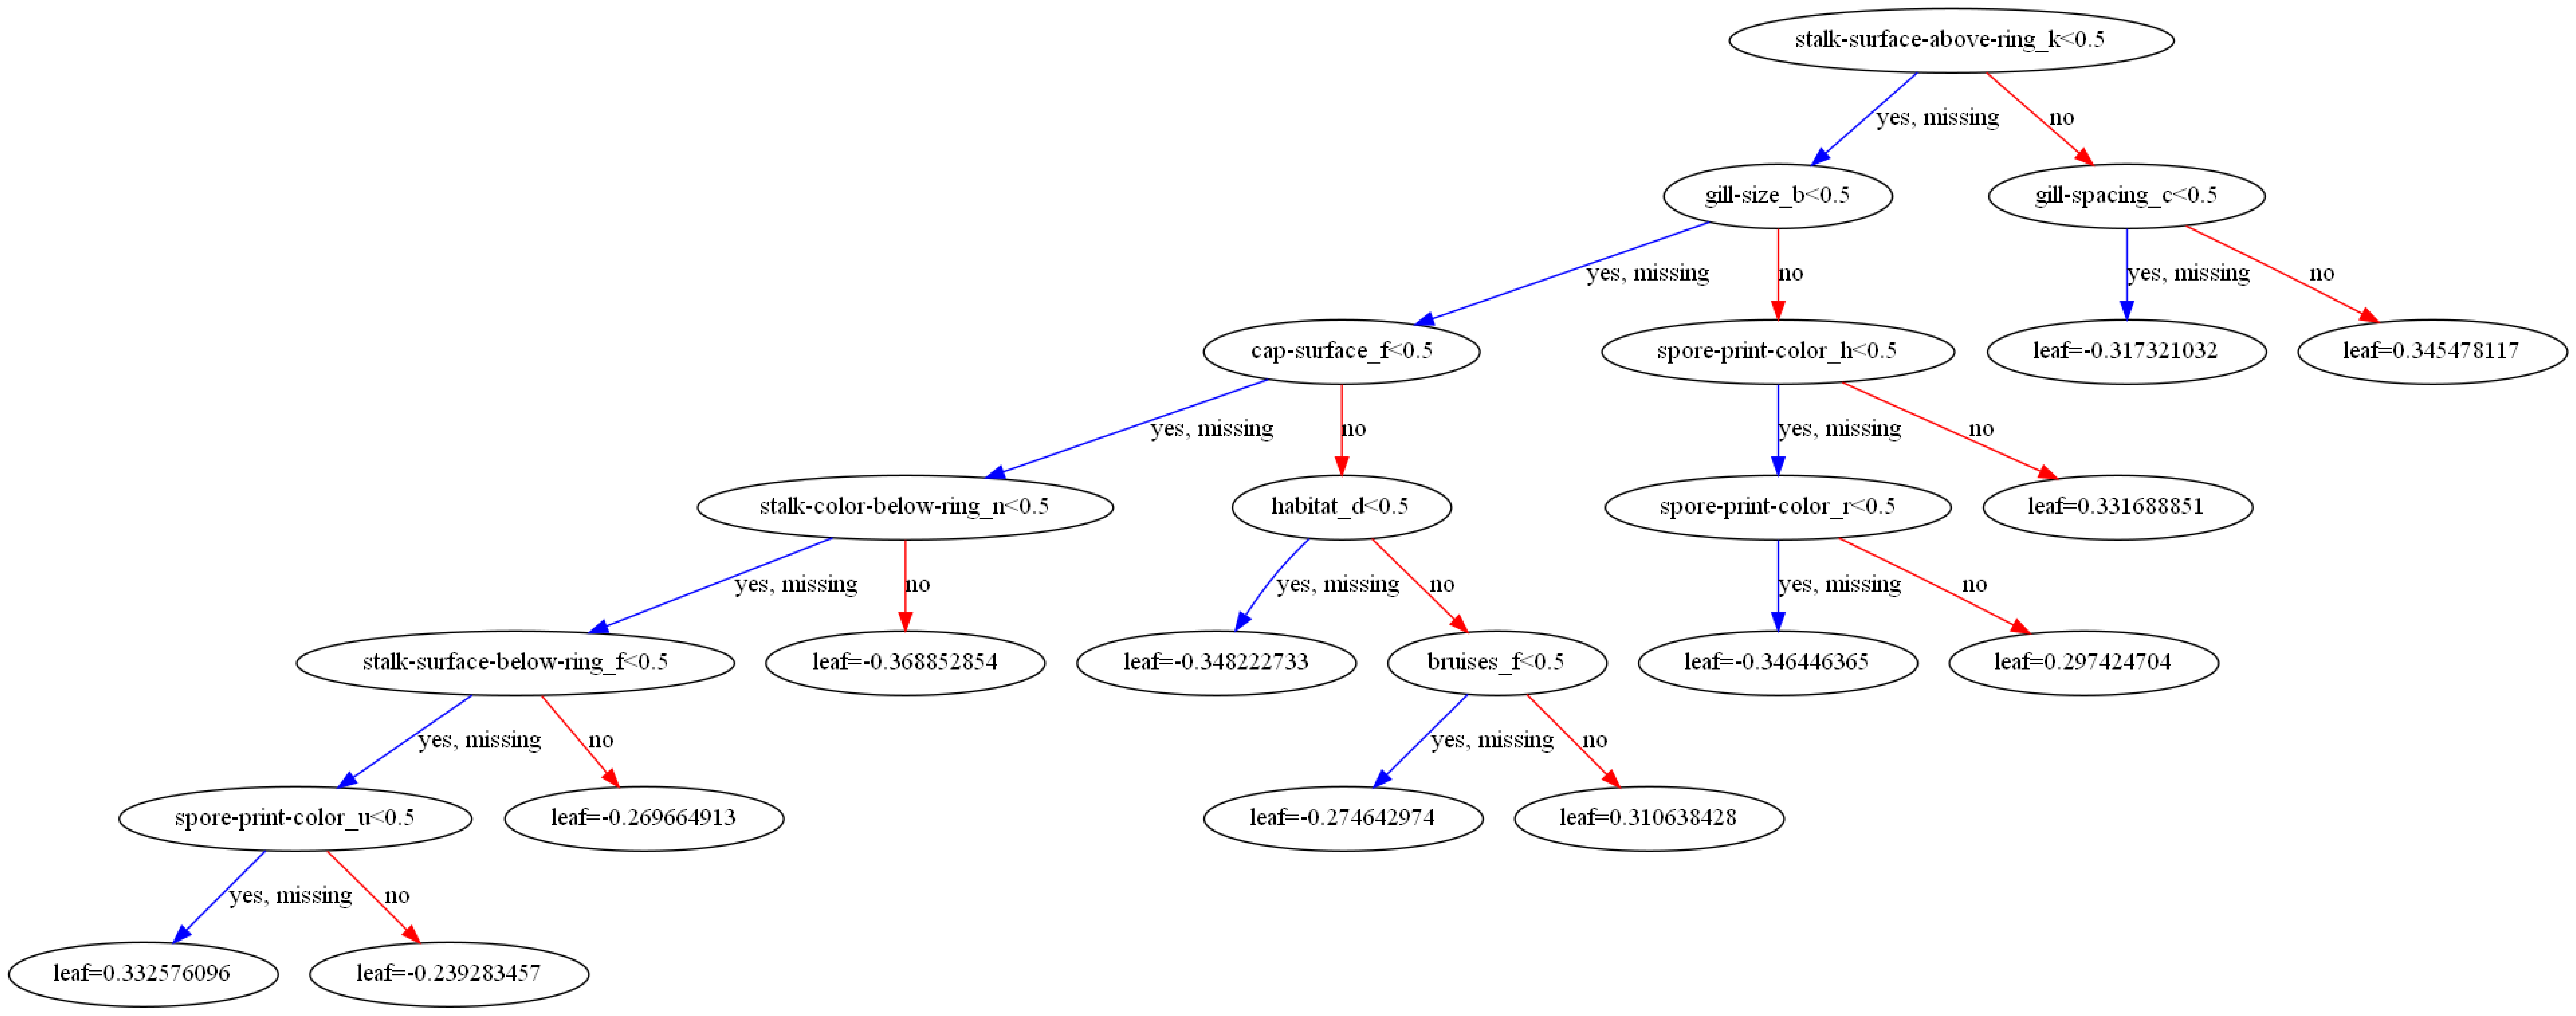

In [46]:
plt.rcParams["figure.figsize"] = (200, 400)
plot_tree(model_XGB, num_trees=4); plt.show()

In [47]:
plt.rcParams["figure.figsize"] = (400, 400)
plot_tree(model_XGB, num_trees=0, rankdir='LR'); plt.show()

### Feature importance for xgboost

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


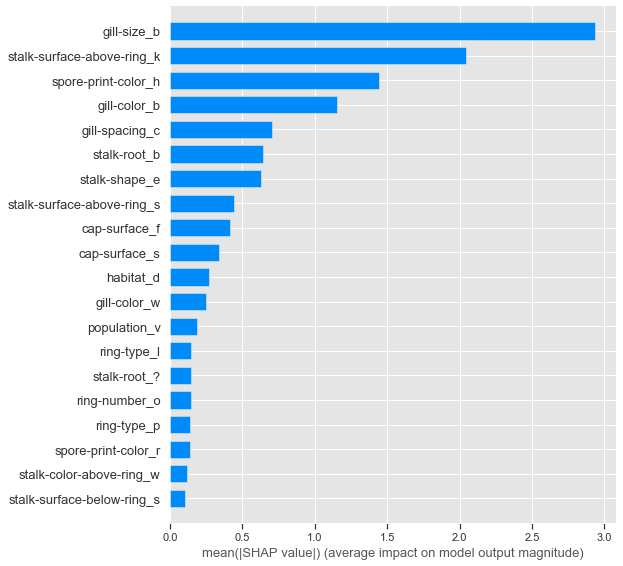

In [48]:
import shap
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)

In [51]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=rf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=rf.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=rf.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  1.0


Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



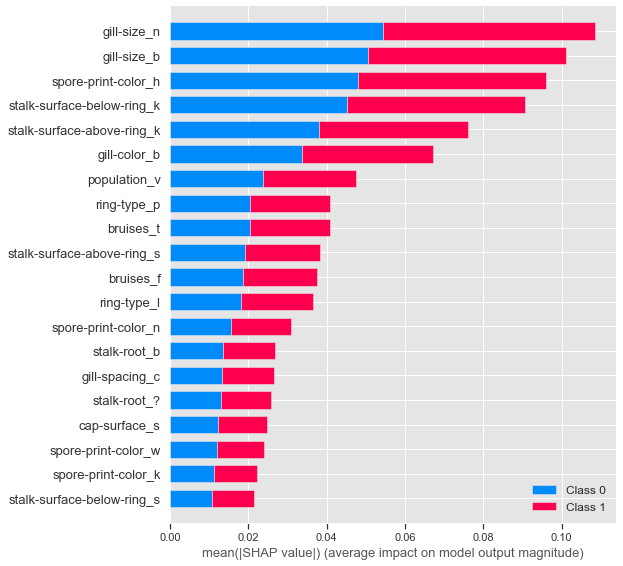

In [52]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")